# Class 8 Exercises 

These exercises will help you practice the skills and concepts that you learned in today's class.

To get participation credit for today's class, make sure that you work on these exercises and then submit a screenshot or PDF of your work to the appropriate assignment page in Canvas.

___

## Datasheets for Datasets
### *The Pudding*'s Film Dialogue Data

The dataset that we're working with in this lesson is taken from Hannah Andersen and Matt Daniels's *Pudding* essay, ["Film Dialogue from 2,000 screenplays, Broken Down by Gender and Age"](https://pudding.cool/2017/03/film-dialogue/). The dataset provides information about 2,000 films from 1925 to 2015, including characters’ names, genders, ages, how many words each character spoke in each film, the release year of each film, and how much money the film grossed. They included character gender information because they wanted to contribute data to a broader conversation about how "white men dominate movie roles."

___

Our goals in this notebook:

- Can we identify and plot the top 20 movies with the most male vs female dialogue?

- Can we plot the age distribution of actors between women and men?

## Import Pandas

To use the Pandas library, we first need to `import` it.

In [1]:
import pandas as pd

## Change Display Settings

By default, Pandas will display 60 rows and 20 columns. I often change [Pandas' default display settings](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html) to show more rows or columns.

In [2]:
pd.options.display.max_rows = 200

## Get Data

In [3]:
film_df = pd.read_csv('Pudding-Film-Dialogue-Clean.csv', encoding='utf=8', delimiter=',')

This creates a Pandas [DataFrame object](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#DataFrame) — often abbreviated as *df*, e.g., *slave_voyages_df*. A DataFrame looks and acts a lot like a spreadsheet. But it has special powers and functions that we will discuss in the next few lessons.

## Drop Rows

To drop the character from the dataset who are supposedly older than 100, you will need to find the index numbers for every relevant row

In [4]:
age_filter = film_df['age'] > 100
film_df = film_df.drop(film_df[age_filter].index) 

## Groupby

What are the top 20 movies with most female dialogue and the top 20 movies with the most male dialogue? To answer these questions, we need to start split the data into individual films as well as filter by character gender.


First, to start our exercises, let's group by film title and then calculate the sum total for every single column.

In [5]:
film_df.groupby('title').sum()

,release_year,words,proportion_of_dialogue,age,gross,script_id
title,,,,,,
(500) Days of Summer,26117,18500,1.0,378.0,481.0,19942
10 Things I Hate About You,23988,19680,1.0,307.0,780.0,18144
12 Years a Slave,56364,19628,1.0,712.0,1680.0,42476
12 and Holding,30075,15968,1.0,513.0,0.0,22710
127 Hours,8040,5145,1.0,114.0,80.0,6080
...,...,...,...,...,...,...
Zero Effect,13986,13927,1.0,227.0,21.0,57106
Zerophilia,16040,16686,1.0,160.0,0.0,30144
Zodiac,62217,14656,1.0,1071.0,1271.0,201221


Now let's group by film title, select the `words` column, and then calculate the sum total for every column.

In [6]:
film_df.groupby('title')['words'].sum()

title
(500) Days of Summer          18500
10 Things I Hate About You    19680
12 Years a Slave              19628
12 and Holding                15968
127 Hours                      5145
                              ...  
Zero Effect                   13927
Zerophilia                    16686
Zodiac                        14656
eXistenZ                       9447
xXx                            8285
Name: words, Length: 1994, dtype: int64

Group by film title AND gender, isolate the column `words`, and then calculate the sum total for every column.

*Note: Remember that to group by multiple columns, you need to put the column names in square brackets `[]`.*

In [7]:
film_df.groupby(['title', 'gender'])['words'].sum()

title                       gender
(500) Days of Summer        man       12762
                            woman      5738
10 Things I Hate About You  man       10688
                            woman      8992
12 Years a Slave            man       16176
                                      ...  
Zodiac                      woman      1421
eXistenZ                    man        5695
                            woman      3752
xXx                         man        7287
                            woman       998
Name: words, Length: 3936, dtype: int64

## Filter, Then Groupby

Filter the DataFrame for only characters labeled as `woman`. Then save this filtered DataFrame as `women_film_df`. Be sure to make a `.copy()`

In [8]:
women_filter = film_df['gender'] == 'woman'

In [9]:
women_film_df = film_df[women_filter].copy()

Filter the DataFrame for only characters labeled as `man`. Then save this filtered DataFrame as `men_film_df`. Be sure to make a `.copy()`

In [10]:
men_filter = film_df['gender'] == 'man'

In [11]:
men_film_df = film_df[men_filter].copy()

Now group `women_film_df` by film title, select the `words` column, and sum the `words` spoken by women.

In [12]:
women_film_df.groupby('title')['words'].sum()

title
(500) Days of Summer          5738
10 Things I Hate About You    8992
12 Years a Slave              3452
12 and Holding                5324
127 Hours                      809
                              ... 
Zero Effect                   2216
Zerophilia                    4612
Zodiac                        1421
eXistenZ                      3752
xXx                            998
Name: words, Length: 1940, dtype: int64

Assign the resulting Series to a new variable `women_by_film`

In [13]:
women_by_film = women_film_df.groupby('title')['words'].sum()

With the same workflow as above, make a new another new variable `men_by_film`

In [14]:
men_by_film = men_film_df.groupby('title')['words'].sum()

## Sort

Sort `women_by_film` from the film with the most words to the film with the least words. Then examine the top 20 values.

In [15]:
women_by_film.sort_values(ascending=False)[:20]

title
Sex and the City               25184
Stepmom                        25014
Sense and Sensibility          23922
The Help                       21540
Beloved                        19594
Ghost World                    18692
Precious                       17536
Juno                           17534
Music of the Heart             17274
Drag Me to Hell                17236
Margaret                       17229
Amelia                         17014
The Horse Whisperer            16920
Copycat                        16078
Frances                        15978
Agnes of God                   15732
He's Just Not That Into You    15708
An Education                   14330
The Birds                      14284
Wild at Heart                  14014
Name: words, dtype: int64

Assign this sorted list of movies to the variable `top20_women`

In [16]:
top20_women = women_by_film.sort_values(ascending=False)[:20]

With the same workflow, make a new variable `top20_men`

In [17]:
top20_men = men_by_film.sort_values(ascending=False)[:20]

### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

## Making Plots

Make a bar chart of `top20_women`. Give the chart a title, and specify a color.

<AxesSubplot:xlabel='title'>

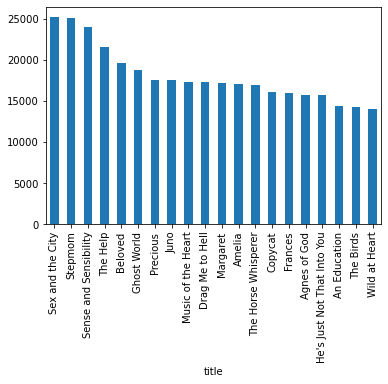

In [18]:
top20_women.plot(kind='bar')

To save the plot, you can use `ax.figure.savefig()` and the name of the file in quotation marks.

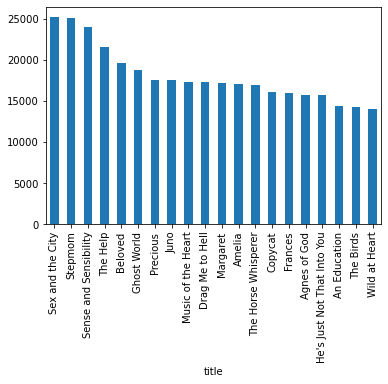

In [20]:
ax = top20_women.plot(kind='bar')
ax.figure.savefig('top20_women.png')

Look in the file browser on the left and double click the PNG file. How does it look? Uh oh!

Sometimes parts of a plot will get cut off when you save it. To fix this issue, you can use a function from the Matplotlib library called `plt.tight_layout()`, which will adjust the plot before you save it.

To use this function, you need to `import matplotlib.pyplot as plt`.

In [ ]:
import matplotlib.pyplot as plt

ax = top20_women.plot(kind='bar')

plt.tight_layout()

ax.figure.savefig('top20_women.png')

Make a bar chart of `top20_men`. Give the chart a title, and specify a color.

<AxesSubplot:xlabel='title'>

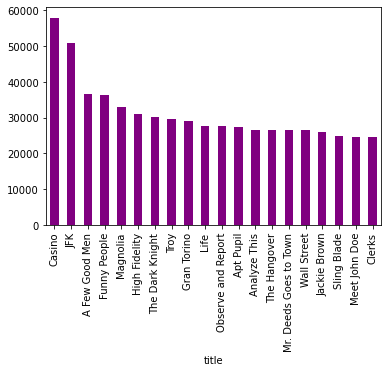

In [22]:
top20_men.plot(kind='bar', color='purple')

To save the plot, you can use `ax.figure.savefig()` and the name of the file in quotation marks.

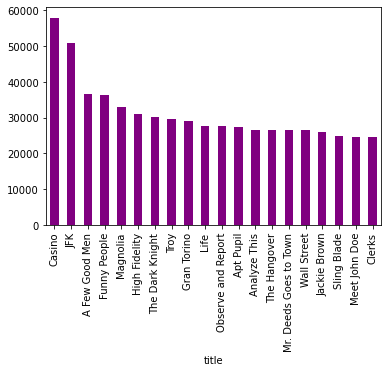

In [24]:
import matplotlib.pyplot as plt

ax = top20_men.plot(kind='bar', color='purple')


ax.figure.savefig('top20_men.png')

Sometimes parts of a plot will get cut off when you save it. To fix this issue, you can use a function from the Matplotlib library called `plt.tight_layout()`, which will adjust the plot before you save it.

To use this function, you need to `import matplotlib.pyplot as plt`.

In [ ]:
import matplotlib.pyplot as plt

ax = top20_men.plot(kind='bar', color='purple')

plt.tight_layout()

ax.figure.savefig('top20_men.png')

## How Do Actors' Ages Differ By Gender?

Below we are creating a histogram with the data viz library seaborn.

Read the [Seaborn documentation]( https://seaborn.pydata.org/generated/seaborn.histplot.html ) for the function `sns.histplot()` and look at the examples to try to make this visualization more clear and compelling. (You should experiment with adding and altering new arguments!) Talk out loud with your group mates to figure out the documentation.

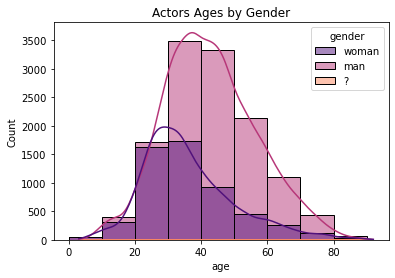

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.histplot(data=film_df , x='age', hue='gender',
             # Make a list of bins from 0 to 100 by 10
             bins= range(0,100,10),
             # Smooth the histogram and make lines
             kde=True,
             # Give it a matplotlib color palette
             palette='magma')

#Explicitly make a title
plt.title('Actors Ages by Gender')

plt.savefig('hist.jpg')

When you have a data visualization that you're happy with, add it to [this shared Google Doc](https://docs.google.com/document/d/1vVGZETJP4MsnOhFIHbb6GgPoZwwGeg4JwPH8BLPCLOI/edit?usp=sharing). You can right-click the image in your file browser and download it, then drag and drop it into the Google Doc.